In [6]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [7]:
fer_images = pd.read_csv('/Users/lab/Documents/Datasets/fer2013/fer2013.csv')

In [8]:
def makeMat(str_arr, size=(48,48)):
    vec = np.array(str_arr.split()).astype(float)
    return vec.reshape(48,48)

fer_images['mat'] = fer_images['pixels'].map(lambda x: makeMat(x))

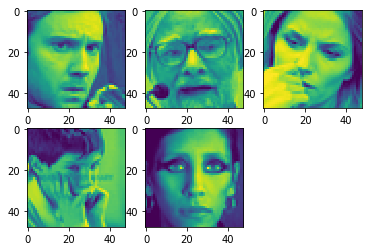

In [9]:
fig = plt.figure()
x = 1
for i in fer_images['mat'].head().values:
    fig.add_subplot(2,3,x)
    imgplt = plt.imshow(i)
    x += 1

In [12]:
import os
import cv2

imgs = []
index = []
for root,dirs,files in os.walk('/Users/lab/Documents/Datasets/ulitmateEmotion/emotion', topdown=False):
    if(root.find('\\') != -1):
        print(root)
        emotion = root.split('\\')[1]
        for file in files:
            if file.find('.jpg') != -1 or file.find('.jpeg') != -1:
                img = cv2.imread(os.path.join(root,file))
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                imgs.append(gray)
                index.append(emotion)

img_ser = Series(Series(imgs, index=index))
print(img_ser.head())

ImportError: cannot import name 'cv2'

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
fig = plt.figure()
i = 1
new_img = img_ser
for img in new_img[:90]:
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if len(faces) == 0:
        for (x,y,w,h) in faces:
            cv2.circle(img,(x,y), 10, (255,0,0))
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        fig.add_subplot(4,5,i)
        plt.imshow(img)
        i += 1
        print(x,y)

